# Provide insights to the Marketing Team in Food & Beverage Industry

Domain: F & B   

Function: Marketing  

CodeX is a German beverage company that is aiming to make its mark in the Indian market. A few months ago, they launched their energy drink in 10 cities in India.

Their Marketing team is responsible for increasing brand awareness, market share, and product development. They conducted a survey in those 10 cities and received results from 10k respondents. Peter Pandey, a marketing data analyst is tasked to convert these survey results to meaningful insights which the team can use to drive actions.

Resource: https://codebasics.io/challenge/codebasics-resume-project-challenge/9

Author: Bao Thai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dim_cities = pd.read_csv('C:/Users/Admin/Desktop/Projects/C6_Challenge_CodeBasic/Dataset/dim_cities.csv')
cities = dim_cities.copy()
cities.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [3]:
cities.shape

(10, 3)

In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [5]:
dim_respondent = pd.read_csv("C:/Users/Admin/Desktop/Projects/C6_Challenge_CodeBasic/Dataset/dim_repondents.csv")
respondent = dim_respondent.copy()
respondent.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [6]:
respondent.shape

(10000, 5)

In [7]:
respondent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
fact_survey_responses = pd.read_csv("C:/Users/Admin/Desktop/Projects/C6_Challenge_CodeBasic/Dataset/fact_survey_responses.csv")
survey = fact_survey_responses.copy()
survey.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [9]:
survey.shape

(10000, 23)

In [10]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [11]:
respondent_survey = respondent.merge(survey, on = 'Respondent_ID', how = 'inner')
respondent_survey.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,103002,2-3 times a month,Throughout the day,To boost performance,No,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,Yuvraj Virk,15-18,Male,CT116,103003,Rarely,Before exercise,Increased energy and focus,No,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,Pranay Chand,31-45,Female,CT113,103004,2-3 times a week,To stay awake during work/study,To boost performance,No,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,Mohanlal Joshi,19-30,Female,CT120,103005,Daily,To stay awake during work/study,Increased energy and focus,Yes,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [12]:
def swap_columns(respondent_survey, col1, col2, col3, col4, col5):
    col_list = list(respondent_survey.columns)
    a, b, c, d, e = col_list.index(col1), col_list.index(col2), col_list.index(col3), col_list.index(col4), col_list.index(col5)
    col_list[a], col_list[b], col_list[c], col_list[d], col_list[e] = col_list[e], col_list[d], col_list[a], col_list[b], col_list[c]
    respondent_survey = respondent_survey[col_list]
    return respondent_survey

In [13]:
respondent_survey = swap_columns(respondent_survey, 'Name', 'Age', 'Gender', 'City_ID', 'Response_ID')
respondent_survey.head(8)

,Respondent_ID,Response_ID,City_ID,Name,Age,Gender,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,103001,CT117,Aniruddh Issac,15-18,Female,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,103002,CT118,Trisha Rout,19-30,Male,2-3 times a month,Throughout the day,To boost performance,No,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,103003,CT116,Yuvraj Virk,15-18,Male,Rarely,Before exercise,Increased energy and focus,No,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,103004,CT113,Pranay Chand,31-45,Female,2-3 times a week,To stay awake during work/study,To boost performance,No,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,103005,CT120,Mohanlal Joshi,19-30,Female,Daily,To stay awake during work/study,Increased energy and focus,Yes,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
5,120036,103006,CT118,Zeeshan Ratta,19-30,Female,Rarely,For mental alertness,To combat fatigue,Yes,...,Wider range of flavors,Vitamins,Yes,Yes,TV commercials,Other,Yes,Above 150,Gyms and fitness centers,Social outings/parties
6,120037,103007,CT112,Oorja Anne,19-30,Male,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,...,Other,Guarana,Yes,No,Online ads,Innovative bottle design,Yes,100-150,Other,Sports/exercise
7,120038,103008,CT116,Rhea Khanna,19-30,Male,Rarely,Before exercise,To combat fatigue,No,...,Reduced sugar content,Sugar,Yes,Not Sure,Online ads,Compact and portable cans,Yes,50-99,Gyms and fitness centers,Social outings/parties


In [14]:
df = respondent_survey.merge(cities, on = 'City_ID', how = 'inner')
df.head() 

,Respondent_ID,Response_ID,City_ID,Name,Age,Gender,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City,Tier
0,120031,103001,CT117,Aniruddh Issac,15-18,Female,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Ahmedabad,Tier 2
1,120055,103025,CT117,Umang Sarkar,31-45,Non-binary,Once a week,Before exercise,To enhance sports performance,Yes,...,No,No,Outdoor billboards,Eco-friendly design,No,Above 150,Gyms and fitness centers,Studying/working late,Ahmedabad,Tier 2
2,120057,103027,CT117,Kanav Thaman,19-30,Male,Daily,Before exercise,To boost performance,No,...,No,Not Sure,TV commercials,Innovative bottle design,No,50-99,Online retailers,Sports/exercise,Ahmedabad,Tier 2
3,120078,103048,CT117,Suhana Ramakrishnan,19-30,Female,Rarely,Before exercise,To enhance sports performance,No,...,Yes,Yes,TV commercials,Other,Not Sure,100-150,Supermarkets,Sports/exercise,Ahmedabad,Tier 2
4,120098,103068,CT117,Saira Sridhar,19-30,Male,Daily,Throughout the day,Other,No,...,Yes,No,TV commercials,Compact and portable cans,Yes,100-150,Other,Studying/working late,Ahmedabad,Tier 2


In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Respondent_ID                   10000 non-null  int64 
 1   Response_ID                     10000 non-null  int64 
 2   City_ID                         10000 non-null  object
 3   Name                            10000 non-null  object
 4   Age                             10000 non-null  object
 5   Gender                          10000 non-null  object
 6   Consume_frequency               10000 non-null  object
 7   Consume_time                    10000 non-null  object
 8   Consume_reason                  10000 non-null  object
 9   Heard_before                    10000 non-null  object
 10  Brand_perception                10000 non-null  object
 11  General_perception              10000 non-null  object
 12  Tried_before                    10000 non-null 

In [17]:
df.isna().sum()

Respondent_ID                     0
Response_ID                       0
City_ID                           0
Name                              0
Age                               0
Gender                            0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
City                        

# Primary Insight

## Demographic Insights

### Who prefers energy drink more?

In [18]:
Gender = df['Gender'].value_counts()
Gender

Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64

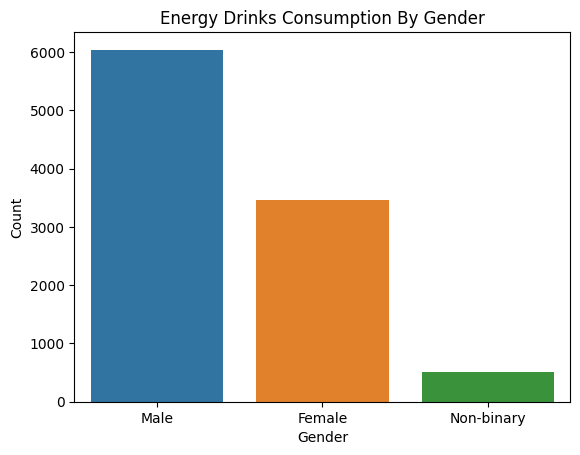

In [19]:
sns.barplot(x = Gender.index, y = Gender.values)
plt.title('Energy Drinks Consumption By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

We can see that Male consumes the most energy drinks, and Non-binary do not like energy drinks as much as Male and Female

### Which age group prefers energy drinks more?

In [20]:
Age = df['Age'].value_counts()
Age

19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: Age, dtype: int64

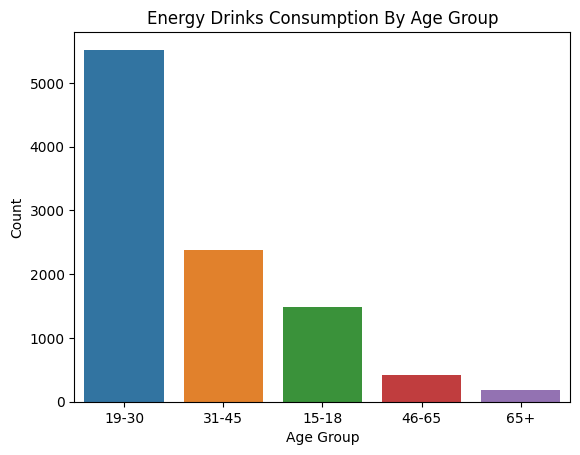

In [21]:
sns.barplot(x = Age.index, y = Age.values)
plt.title('Energy Drinks Consumption By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Young generation is the group age (19-30) that use more energy drinks than the rest

### Which type of marketing reaches the most Youth (15-30)?

In [22]:
marketing_reach_youth = df[(df['Age'] == '15-18')|(df['Age'] == '19-30')]['Marketing_channels'].value_counts()
marketing_reach_youth

Online ads            3373
TV commercials        1785
Outdoor billboards     702
Other                  702
Print media            446
Name: Marketing_channels, dtype: int64

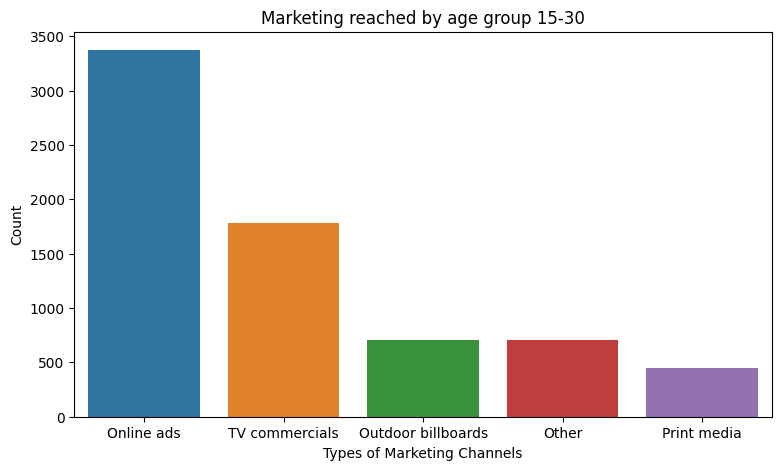

In [23]:
plt.figure(figsize = (9,5))
sns.barplot(x = marketing_reach_youth.index, y = marketing_reach_youth.values)
plt.title('Marketing reached by age group 15-30')
plt.xlabel('Types of Marketing Channels')
plt.ylabel('Count')
plt.show()

Nowadays, young generation between 15-30 use electronic devices to connect things. So there is clearly that Online Ads is easily reach that age group

## Consumer Preferences

### what are the preferred ingredients of energy drinks among respondents?

In [24]:
preferred_ingredients = df['Ingredients_expected'].value_counts()
preferred_ingredients

Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: Ingredients_expected, dtype: int64

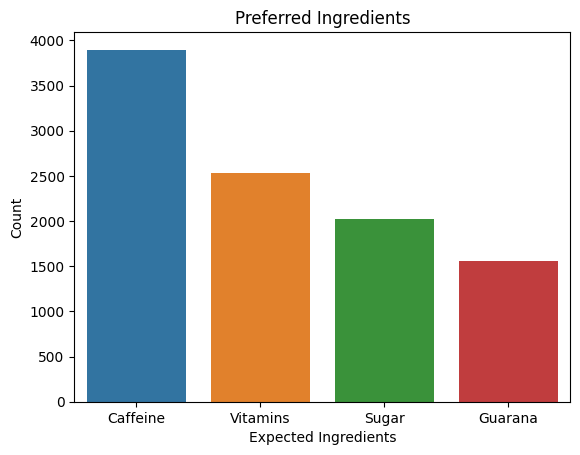

In [25]:
sns.barplot(x = preferred_ingredients.index, y = preferred_ingredients.values)
plt.title('Preferred Ingredients')
plt.xlabel('Expected Ingredients')
plt.ylabel('Count')
plt.show()

It can be easily recognized that many people use energy drinks for the reason of wanting to maintain awaken in work, study, physical exercise, sport. So they really want to have caffeine in energy drinks

### What packaging preferences do respondents have for energy drinks?

In [26]:
packaging_preference = df['Packaging_preference'].value_counts()
packaging_preference

Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
Name: Packaging_preference, dtype: int64

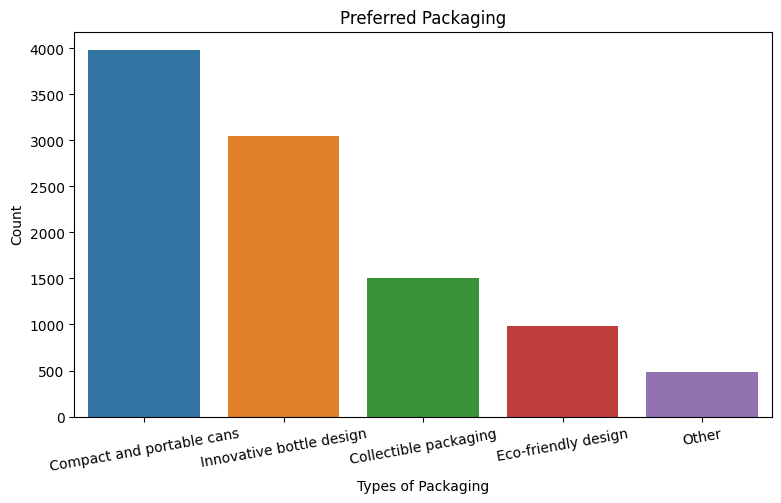

In [27]:
plt.figure(figsize = (9,5))
sns.barplot(x = packaging_preference.index, y = packaging_preference.values)
plt.title('Preferred Packaging')
plt.xlabel('Types of Packaging')
plt.ylabel('Count')
plt.xticks(rotation = 10)
plt.show()

3984 respondents chose compact and portable cans as their preferred packaging for energy drinks. This means that compact and portable cans are the most popular option among the respondents, followed by innovative bottle design, collectible packaging, eco-friendly design, and other. The question is designed to understand the consumer preferences and behavior regarding energy drinks and their packaging.

## Competition Analysis

### Who are the current market leader?

In [290]:
market_leader = df['Current_brands'].value_counts()
market_leader

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64

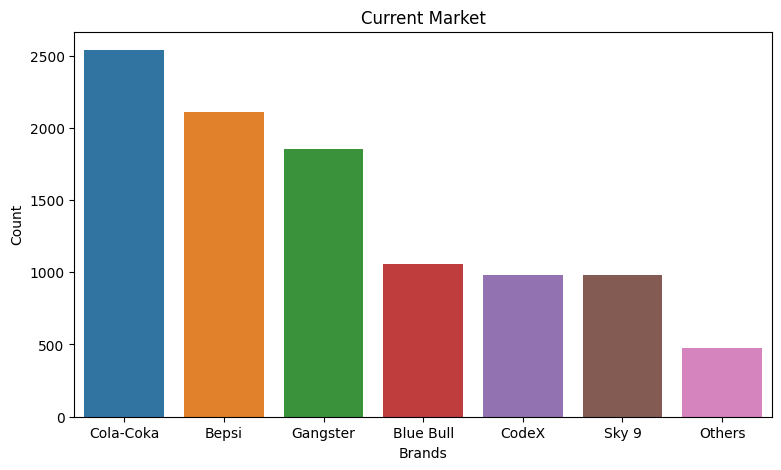

In [298]:
plt.figure(figsize = (9,5))
sns.barplot(x = market_leader.index, y = market_leader.values)
plt.title('Current Market')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.show()

Cola-Coka, Bepsi, Gangster are top 3 energy drinks brands that lead the market in India. While, our brand-CodeX, is at 5th position in market.

### What are the primary reasons consumers prefer those brands over ours?

In [294]:
reason_choosing_brand = df['Reasons_for_choosing_brands'].value_counts()
reason_choosing_brand

Brand reputation           2652
Taste/flavor preference    2011
Availability               1910
Effectiveness              1748
Other                      1679
Name: Reasons_for_choosing_brands, dtype: int64

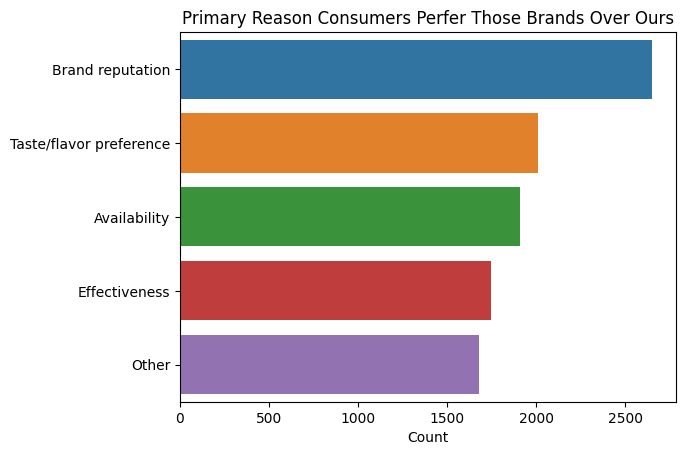

In [297]:
sns.barplot(x = reason_choosing_brand.values, y = reason_choosing_brand.index, orient = 'h')
plt.title('Primary Reason Consumers Perfer Those Brands Over Ours')
plt.xlabel('Count')
plt.show()

Surveys prefer other brands rather than ours because the significant top 3 reasons. First, it is brand reputation. Second, it is taste/flavor preference. The last in top 3 is Availability

## Marketing Channels And Brands Awareness

### Which marketing channel can be used to reach more customers?

In [32]:
marketing_channel = df['Marketing_channels'].value_counts()
marketing_channel

Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: Marketing_channels, dtype: int64

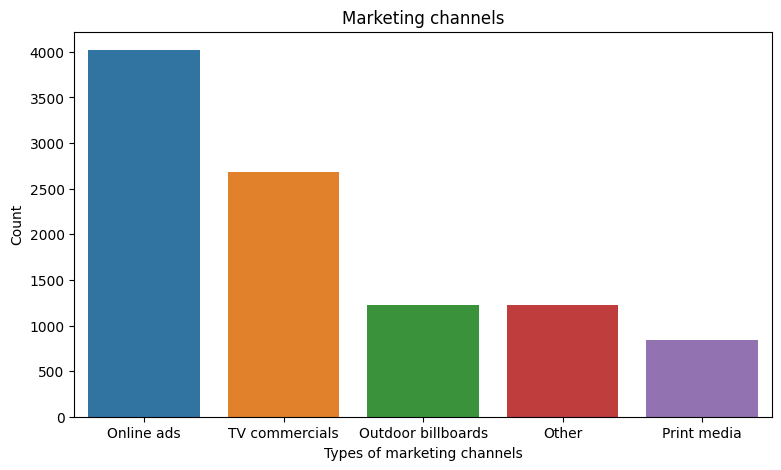

In [33]:
plt.figure(figsize = (9,5))
sns.barplot(x = marketing_channel.index, y = marketing_channel.values)
plt.title('Marketing channels')
plt.xlabel('Types of marketing channels')
plt.ylabel('Count')
plt.show()

The people use electric devices more often in life. So Online ads are the most effective way of reaching customers

### How effective different marketing strategies and channels in reaching our customers?

In [324]:
heard_before = df['Heard_before'].value_counts()
heard_before

No     5553
Yes    4447
Name: Heard_before, dtype: int64

In [325]:
effective_marketing = df['Heard_before'].groupby(df['Marketing_channels']).value_counts()
effective_marketing = effective_marketing.reset_index(name = 'Count')
effective_marketing = effective_marketing.sort_values(by = 'Count', ascending = False)
effective_marketing

,Marketing_channels,Heard_before,Count
0,Online ads,No,2215
1,Online ads,Yes,1805
8,TV commercials,No,1431
9,TV commercials,Yes,1257
2,Other,No,735
4,Outdoor billboards,No,702
5,Outdoor billboards,Yes,524
3,Other,Yes,490
6,Print media,No,470
7,Print media,Yes,371


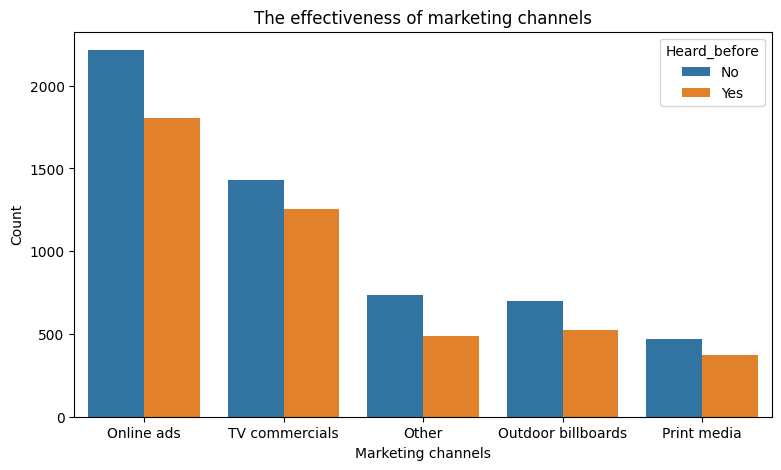

In [326]:
plt.figure(figsize = (9,5))
sns.barplot(x = effective_marketing['Marketing_channels'], y = effective_marketing['Count'], hue = effective_marketing['Heard_before'])
plt.title('The effectiveness of marketing channels')
plt.xlabel('Marketing channels')
plt.ylabel('Count')
plt.show()

Online ads are the most heard of marketing channel and Print media is the least heard of marketing channel

## Brand Penetration

### What do people think about our brand? (overall rating)

In [118]:
tried_before = df['Tried_before'].value_counts()
tried_before

No     5119
Yes    4881
Name: Tried_before, dtype: int64

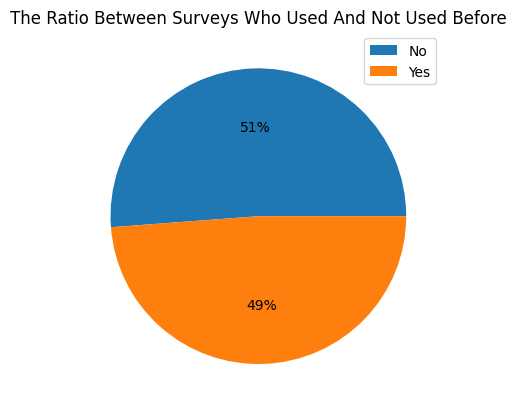

In [124]:
plt.pie(x = tried_before, autopct = '%.0f%%')
plt.title('The Ratio Between Surveys Who Used And Not Used Before')
plt.legend(tried_before.index)
plt.show()

There is not different much between percentage of those who tried and those who not tried our brand before

In [215]:
taste = df['Taste_experience'].value_counts()
taste

3    2957
4    2479
5    1986
2    1524
1    1054
Name: Taste_experience, dtype: int64

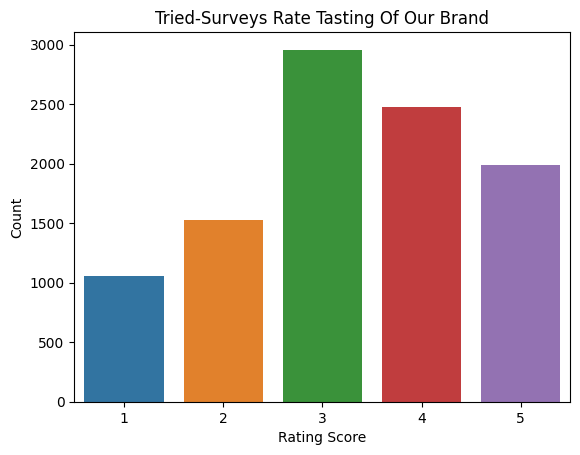

In [233]:
sns.barplot(x =taste.index ,y = taste.values)
plt.title('Tried-Surveys Rate Tasting Of Our Brand')
plt.ylabel('Count')
plt.xlabel('Rating Score')
plt.show()

Most of surveys who have tried our brand before rated its taste at 3, which is Average. Following, it is 4, which is Good taste

In [234]:
reasons_prevent = df['Reasons_preventing_trying'].value_counts()
reasons_prevent

Not available locally              2431
Health concerns                    2258
Not interested in energy drinks    2193
Unfamiliar with the brand          1850
Other                              1268
Name: Reasons_preventing_trying, dtype: int64

Text(0.5, 0, 'Count')

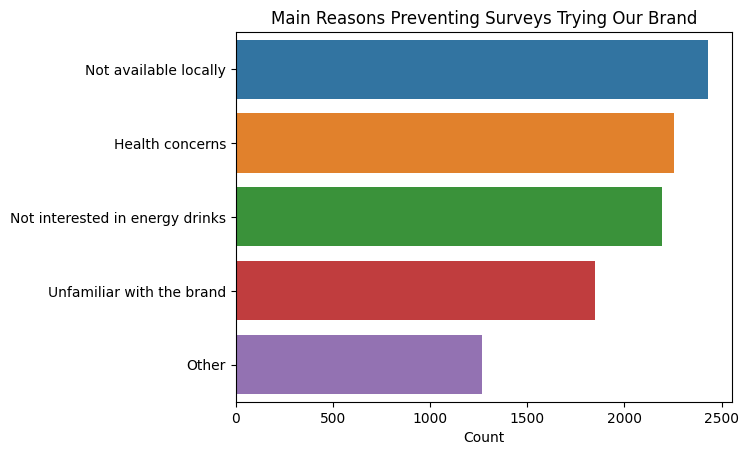

In [241]:
sns.barplot(x = reasons_prevent.values, y = reasons_prevent.index, orient = 'h')
plt.title('Main Reasons Preventing Surveys Trying Our Brand')
plt.xlabel('Count')

There are top reasons that surveys selected as their main reason preventing them trying our brand. First, Not available on local stores. Second, they care about health

### Which cities do we need to focus on?

In [279]:
city = df['City'].value_counts()

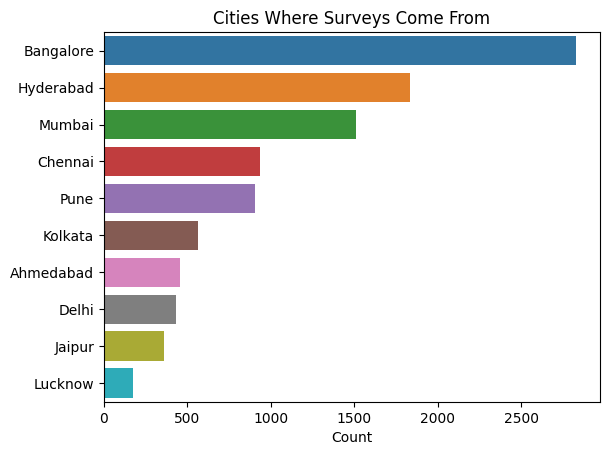

In [286]:
sns.barplot(x = city.values, y = city.index, orient ='h')
plt.title('Cities Where Surveys Come From')
plt.xlabel('Count')
plt.show()

This chart show the cities where surveys come from

In [283]:
non_heard_filter = df[df['Heard_before'] == 'No']
non_heard_city = non_heard_filter['City'].value_counts()

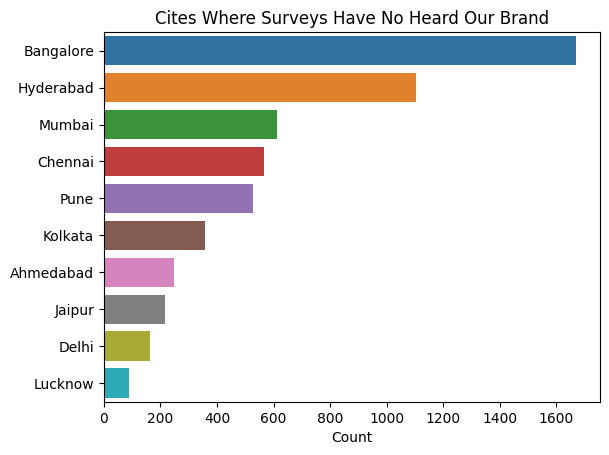

In [288]:
sns.barplot(x = non_heard_city.values, y = non_heard_city.index, orient = 'h')
plt.title('Cites Where Surveys Have No Heard Our Brand')
plt.xlabel('Count')
plt.show()

The top 3 cities Bangalore, Hyderabad, Mumbai that lack our brand recognition

## Purchase Behavior

### Where do respondents prefer to purchase energy drinks?

In [300]:
purchase_location = df['Purchase_location'].value_counts()
purchase_location

Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: Purchase_location, dtype: int64

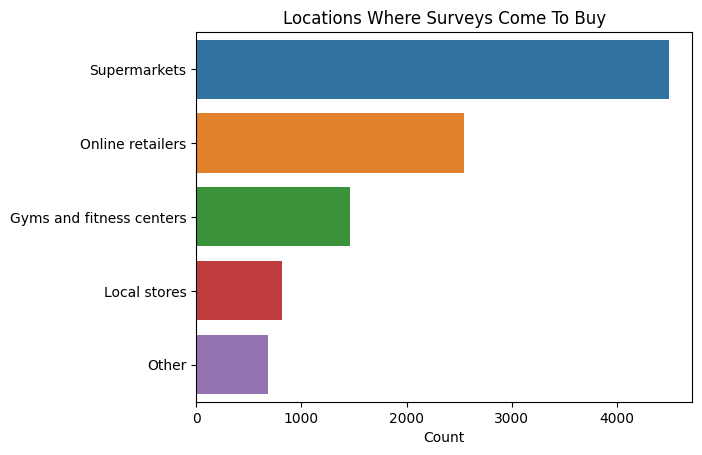

In [302]:
sns.barplot(x = purchase_location.values, y = purchase_location.index, orient = 'h')
plt.title('Locations Where Surveys Come To Buy')
plt.xlabel('Count')
plt.show()

Most people come to Supermarket to buy energy drink

### What are the typical consumption situations for the energy drinks among respondents?

In [305]:
consumption_situations = df['Typical_consumption_situations'].value_counts()
consumption_situations

Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: Typical_consumption_situations, dtype: int64

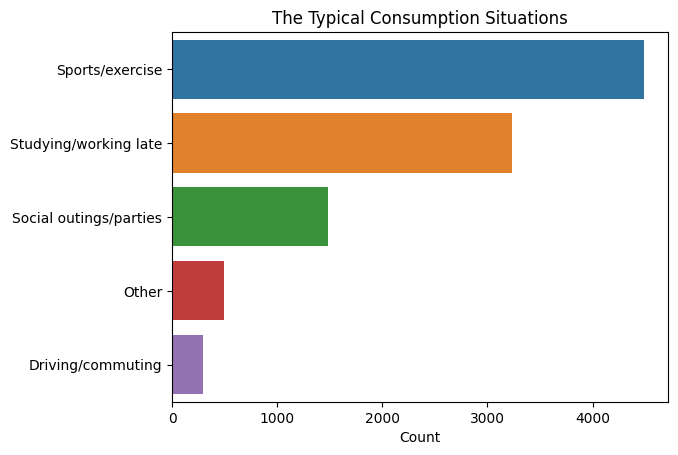

In [307]:
sns.barplot(x = consumption_situations.values, y = consumption_situations.index, orient = 'h')
plt.title('The Typical Consumption Situations')
plt.xlabel('Count')
plt.show()

Sports/excercise and Studying/working late are reasons to consume energy drinks that most surveys selected

### What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [310]:
price_range = df['Price_range'].value_counts()
price_range

50-99        4288
100-150      3142
Above 150    1561
Below 50     1009
Name: Price_range, dtype: int64

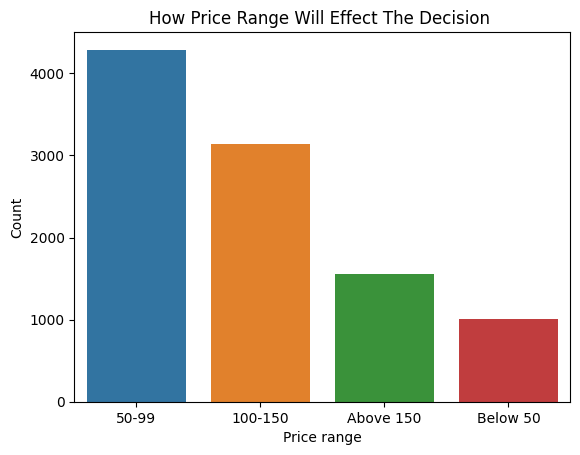

In [313]:
sns.barplot(x = price_range.index, y = price_range.values)
plt.title('How Price Range Will Effect The Decision ')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.show()

Most of people think the range of price between 50 and 99 will effect their decision to buy

In [311]:
limited_packaging = df['Limited_edition_packaging'].value_counts()
limited_packaging

No          4023
Yes         3946
Not Sure    2031
Name: Limited_edition_packaging, dtype: int64

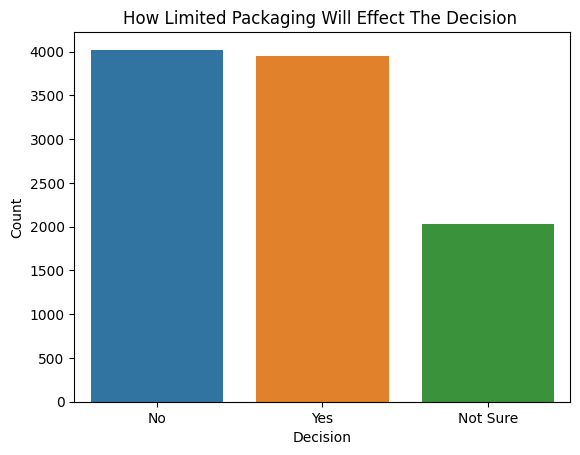

In [315]:
sns.barplot(x = limited_packaging.index, y = limited_packaging.values)
plt.title('How Limited Packaging Will Effect The Decision ')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

Because the number of people who will buy and not buy, if there is a limited edition packaging, is quite high and almost equal. Therefore, we will have to carefully consider whether we will launch a product with a limited edition package or not.

## Product Development

### Which area of business should we focus more on our product development? (Branding/taste/availability)

In [316]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

####  Branding

They are 3 main reasons about our Brading that we need to focus in order to develope product:

First, have a look at pie chart below. This pie chart show us that there are only 44% respondents have heard about our brands before to compare with 56% respondents have never heard before.

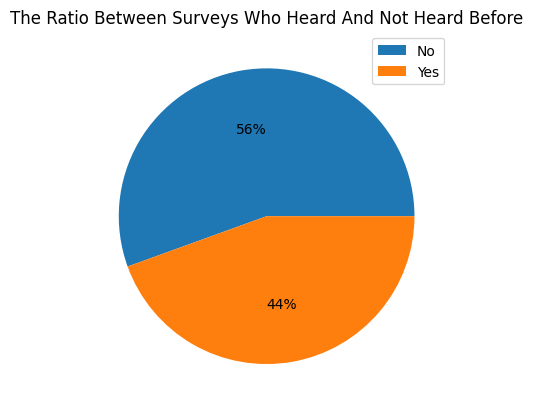

In [330]:
plt.pie(heard_before, autopct = '%.0f%%')
plt.title('The Ratio Between Surveys Who Heard And Not Heard Before')
plt.legend(heard_before.index)
plt.show()

Second, because the lack of branding recognization that mention in first reason above. Our brand "CodeX" is at only 5th. therefore, the competitive pressure in this market is very high if we keep the same position as now

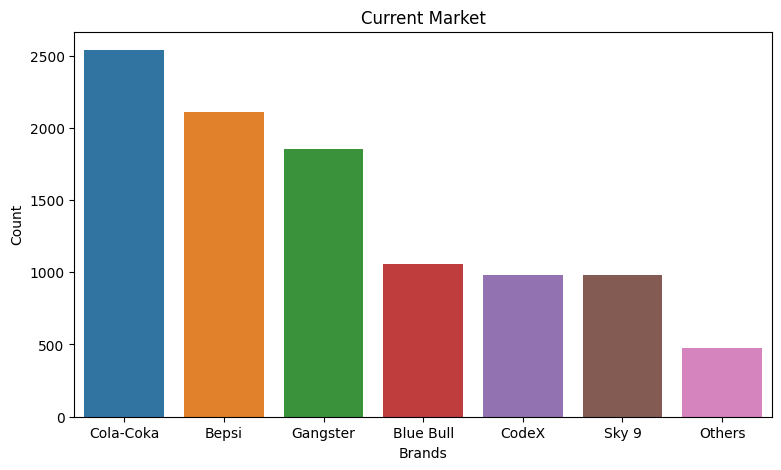

In [323]:
plt.figure(figsize = (9,5))
sns.barplot(x = market_leader.index, y = market_leader.values)
plt.title('Current Market')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.show()

The last reason, Bar chart below illustrates that the primary reason effect consumers' decision. It is mean that, most people decide to buy energy drinks because of how popular brand in market. So we need to focus to develope our branding to improve those issues

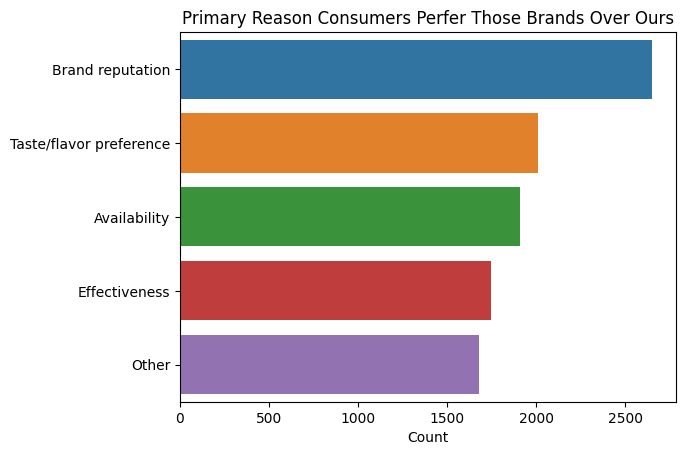

In [322]:
sns.barplot(x = reason_choosing_brand.values, y = reason_choosing_brand.index, orient = 'h')
plt.title('Primary Reason Consumers Perfer Those Brands Over Ours')
plt.xlabel('Count')
plt.show()

#### Taste

There are 4 things that we need to concern in order to improve our brand taste

First, Most respondents concern their health

In [335]:
health_concerns = df['Health_concerns'].value_counts()
health_concerns

Yes    6045
No     3955
Name: Health_concerns, dtype: int64

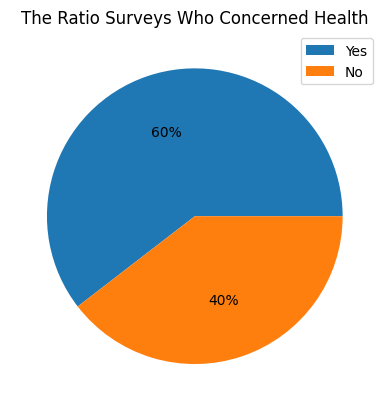

In [339]:
plt.pie(health_concerns, autopct = '%.0f%%')
plt.title('The Ratio Surveys Who Concerned Health')
plt.legend(health_concerns.index)
plt.show()

Second, Most respondents get interested in natural or organic ingredients. It means that if we have natural ingredients, natural elements in our energy drink formula, then this will be our competitive advantage in this market

In [332]:
natural_organic = df['Interest_in_natural_or_organic'].value_counts()
natural_organic

Yes         4983
No          3062
Not Sure    1955
Name: Interest_in_natural_or_organic, dtype: int64

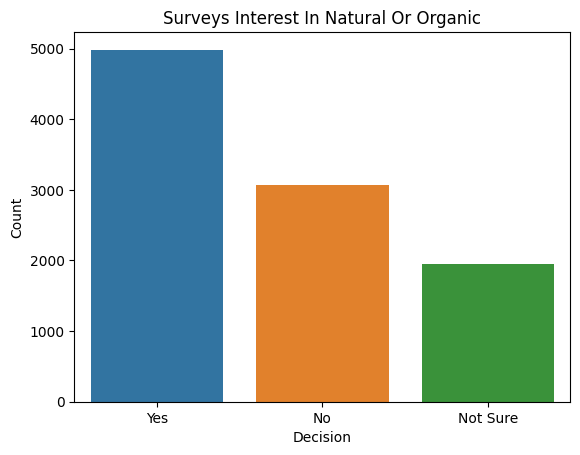

In [334]:
sns.barplot(x = natural_organic.index, y = natural_organic.values)
plt.title('Surveys Interest In Natural Or Organic')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

Third, we need to see the top 3 desired improvements. The respondents want energy drinks on market less sugar than currently. As we know that, in current market, we easily see that energy drinks contain a high level of sugar. So in order to develope our taste, we need to reduce the level of sugar, blend more natural ingredients. If we success do so, our taste/flavor would become wider range, because there is few energy drinks products in this market contain less sugar and natural ingredients

In [340]:
improvements_desired = df['Improvements_desired'].value_counts()
improvements_desired

Reduced sugar content       2995
More natural ingredients    2498
Wider range of flavors      2037
Healthier alternatives      1472
Other                        998
Name: Improvements_desired, dtype: int64

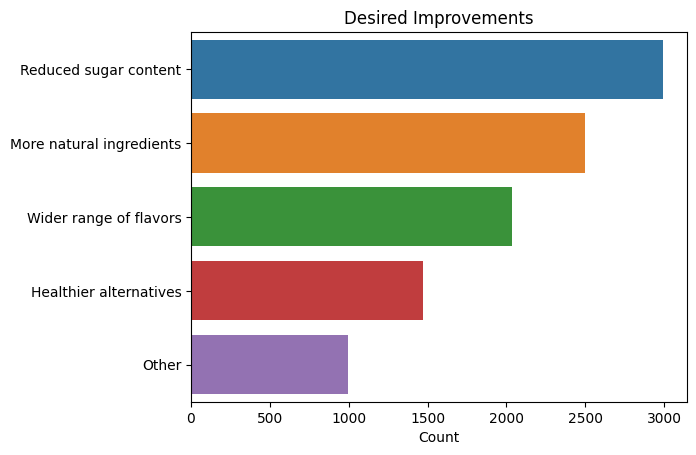

In [342]:
sns.barplot(x = improvements_desired.values, y = improvements_desired.index, orient = 'h')
plt.title('Desired Improvements')
plt.xlabel('Count')
plt.show()

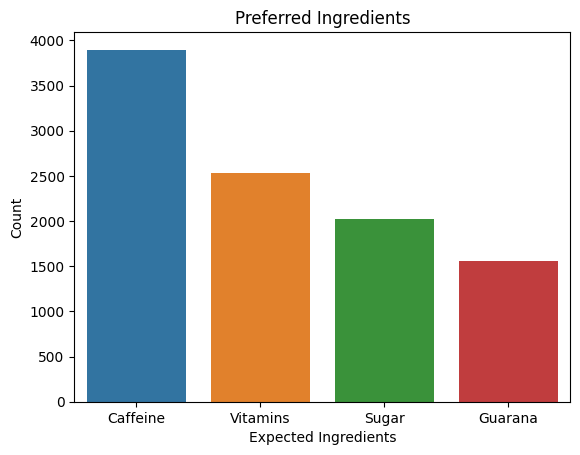

In [331]:
sns.barplot(x = preferred_ingredients.index, y = preferred_ingredients.values)
plt.title('Preferred Ingredients')
plt.xlabel('Expected Ingredients')
plt.ylabel('Count')
plt.show()

The last one, reason that energy drinks produced because it will help consumers maintain their awaken and boost energy. So caffein is always the preferred ingredients in energy drinks

#### Availability

There are main reasons preventing surveys trying our brand. We will analyze

Health concerns: we need to follow the plan about taste above to improve our taste, and be healthier. Therefore, health concerns will be not the main reason preventing surveys buy our product

Not intereted in energy drinks/Unfamiliar with the brand: we need to follow the plan about branding above to improve the branding recognization

Text(0.5, 0, 'Count')

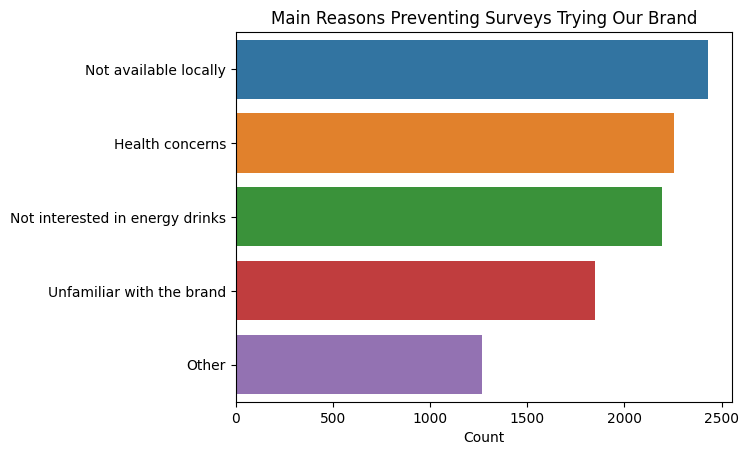

In [343]:
sns.barplot(x = reasons_prevent.values, y = reasons_prevent.index, orient = 'h')
plt.title('Main Reasons Preventing Surveys Trying Our Brand')
plt.xlabel('Count')

The top reason is Not available locally: we need to look the bar chart below that illustrates the behavior of customers. According to that chart, we need to push the strategy distribution of our energy drinks through the nationwide supermarket system

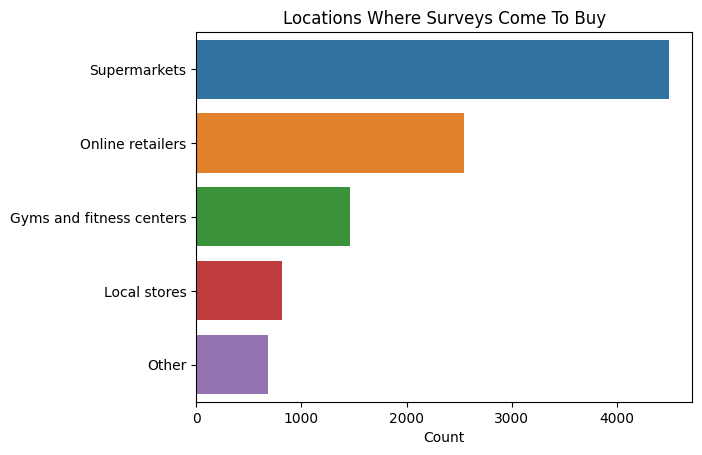

In [344]:
sns.barplot(x = purchase_location.values, y = purchase_location.index, orient = 'h')
plt.title('Locations Where Surveys Come To Buy')
plt.xlabel('Count')
plt.show()

# The End,

# Thank you for reading my project!

Author: Bao Thai